# Dog Vs Cat: Model Prediction Test

## Enviroment Setup

In [1]:
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

import numpy as np
import os
import glob
import cv2
from collections import Counter
import random
import csv


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)

import seaborn as sns
sns.set(color_codes=True)


Using TensorFlow backend.


## Global Variables Initialazation

In [2]:
LABEL_LIST = sorted(["dog", "cat"])
TEST_IMAGE_PATH_LIST = ["./test_image"]
KAGGLE_TEST_PATH = "./test"
KAGGLE_TEST_OUTPUT_DIR = "./kaggle_prediction/"
MODEL_PATH = "./test_models"
IMAGE_SHAPE = (224, 224, 3)

## Helper Functions

In [22]:
def label_one_hot_encoding(labe_list):
    encoder = LabelEncoder()
    transfomed_label = encoder.fit_transform(labe_list)
    one_hot_encoded_labels =  np_utils.to_categorical(transfomed_label)
    one_hot_label_dict = {}
    for i  in range(len(labe_list)):
        one_hot_label_dict[labe_list[i]] = one_hot_encoded_labels[i] 
    
    #inverse the label -> one-hot enchoding 1 to 1 map, turn list to tuple as the key
    inverse_one_hot_encoding_dict = {tuple(v): k for k, v in one_hot_label_dict.items()} 

    return one_hot_label_dict, inverse_one_hot_encoding_dict


def load_samples(DATA_PATH, one_hot_encoding_dict):
    labels = one_hot_encoding_dict.keys()    
    samples = [] # [one_hot_label, image_path]
    temp_size = 0
    for dir in DATA_PATH: 
        print("loading data from: " + dir)
        for key in labels:           
            samples += [[one_hot_encoding_dict[key],file] for file in glob.glob(os.path.join(dir, key + '*.jpg'))]
            temp_size = len(samples) - temp_size    
            print("total " + str(temp_size) + " " + key + " images loaded.")
            temp_size = len(samples)
        
        print("total " + str(temp_size) + " raw data samples loaded.")
        
    return samples


def resize_image(image, output_shape = IMAGE_SHAPE):
    """
    resize image to proper shape, the color channel will not be touched
    """      
    shape = (output_shape[0], output_shape[1])    
    resized_image = cv2.resize(image, shape)
    return resized_image



model_path_list = sorted(glob.glob(os.path.join(MODEL_PATH + '/*.h5')))
print("models: ", model_path_list)


one_hot_encoding_dict, inverse_one_hot_encoding_dict = label_one_hot_encoding(LABEL_LIST)
print("label encoding：", one_hot_encoding_dict)
print("inverse label encoding：", one_hot_encoding_dict)
    
raw_samples = load_samples(TEST_IMAGE_PATH_LIST, one_hot_encoding_dict)
print("raw sample loaded.")

model_dict = dict([(path.split("/")[-1].split("\\")[-1].split(".")[0], path)  for path in model_path_list])
print(model_dict)


models:  ['./test_models/ResNet50.h5', './test_models/VGG16.h5', './test_models/VGG19.h5', './test_models/homebrew_even_deeper.h5']
label encoding： {'dog': array([ 0.,  1.]), 'cat': array([ 1.,  0.])}
inverse label encoding： {'dog': array([ 0.,  1.]), 'cat': array([ 1.,  0.])}
loading data from: ./test_image
total 6 dog images loaded.
total 5 cat images loaded.
total 11 raw data samples loaded.
raw sample loaded.
{'VGG16': './test_models/VGG16.h5', 'VGG19': './test_models/VGG19.h5', 'homebrew_even_deeper': './test_models/homebrew_even_deeper.h5', 'ResNet50': './test_models/ResNet50.h5'}


## Model Prediction Functions

In [4]:
def predict(model, image, inv_encoding):

    image = resize_image(image, IMAGE_SHAPE)
    image = np.expand_dims(image, axis=0)
    
    raw_prediction = model.predict(image)
    print("raw prediction: ", raw_prediction) 
    raw_prediction = np.squeeze(raw_prediction)
    
    normalized_prediction = tuple([1 if max(raw_prediction) == i else 0 for i in raw_prediction])

    
    return raw_prediction , inv_encoding[normalized_prediction]


def predict_and_plot(image_path_list, model_dict, one_hot_encoding_dict):
    
    for image_path in image_path_list:
        image = cv2.imread(image_path)
        image_name = image_path.split("/")[-1].split("\\")[-1]
        prediction_text = image_name + "\n"
        for model_name in sorted(model_dict.keys()):
            model = load_model(model_dict[model_name])
            raw_prediction, label = predict(model, image, one_hot_encoding_dict)
            prediction_text += model_name + " predction: " + label + " raw output: " + str(raw_prediction) + "\n"
            #print(prediction_text)
        
        plt.title(prediction_text)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.savefig("./resource/" + image_name + "_prediction.jpg", bbox_inches="tight")
        plt.show()

## Test Image Prediction

raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 0.4891772   0.51082283]]


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


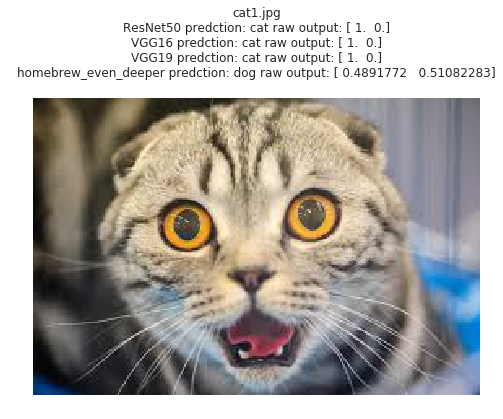

raw prediction:  [[  1.00000000e+00   1.18650086e-16]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 0.84836632  0.15163369]]


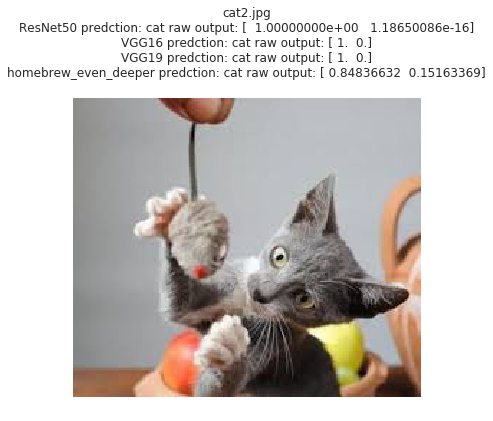

raw prediction:  [[  1.00000000e+00   6.07020614e-11]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 0.40846953  0.5915305 ]]


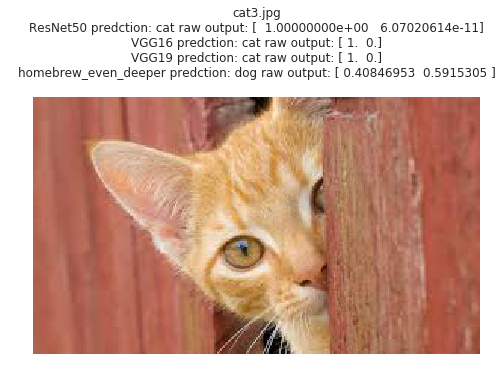

raw prediction:  [[  1.00000000e+00   1.26669972e-17]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 0.11739068  0.88260925]]


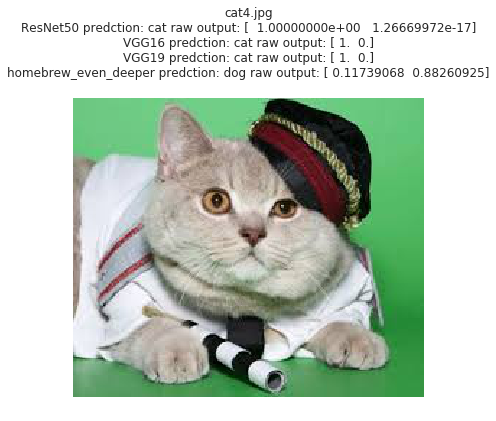

raw prediction:  [[  1.00000000e+00   3.47572065e-19]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 0.00665362  0.99334645]]


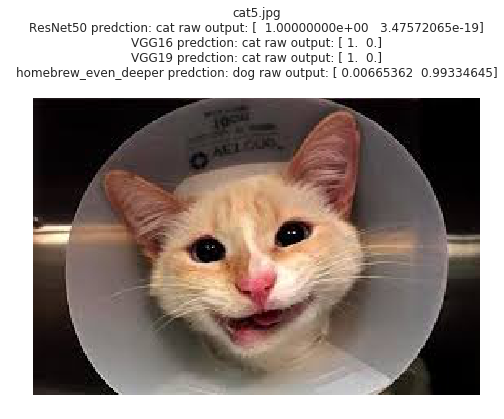

raw prediction:  [[  4.80636930e-31   1.00000000e+00]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[  4.93089610e-04   9.99506950e-01]]


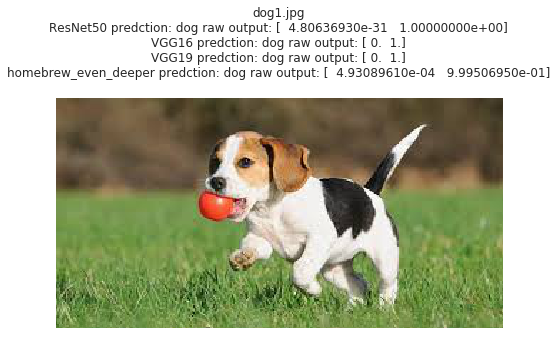

raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[  1.55710477e-05   9.99984384e-01]]


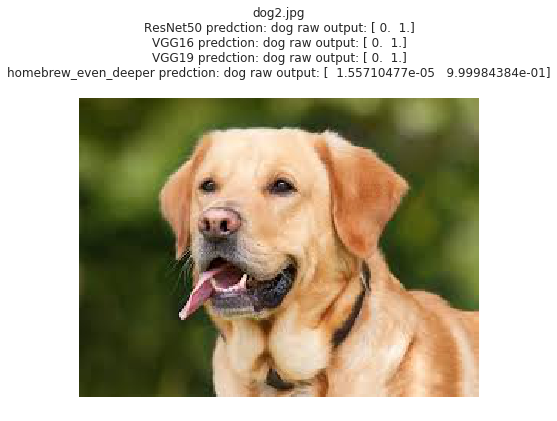

raw prediction:  [[  1.55489235e-15   1.00000000e+00]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.00111197  0.99888808]]


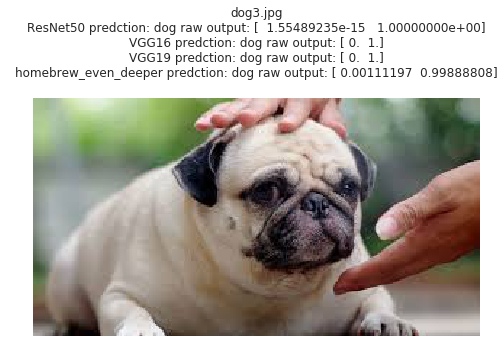

raw prediction:  [[  1.37699844e-05   9.99986172e-01]]
raw prediction:  [[ 1.  0.]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.08364888  0.91635114]]


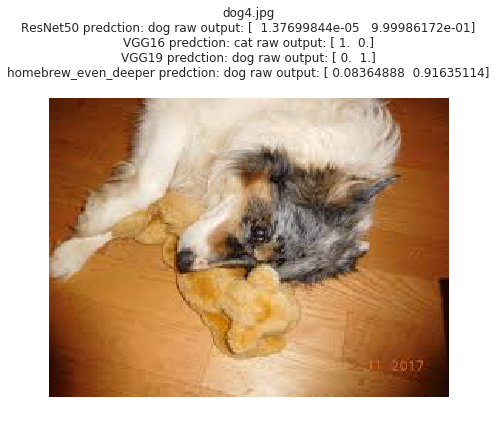

raw prediction:  [[  7.30816217e-28   1.00000000e+00]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.00122691  0.99877304]]


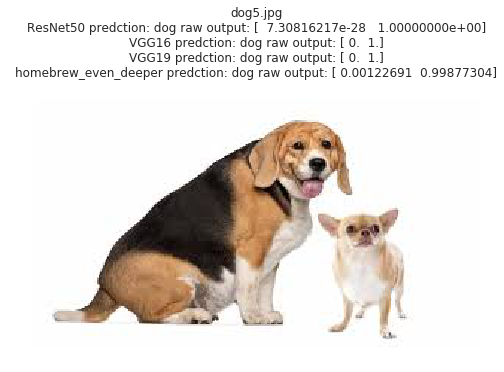

raw prediction:  [[ 0.01392018  0.98607987]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.  1.]]
raw prediction:  [[ 0.00615013  0.99384993]]


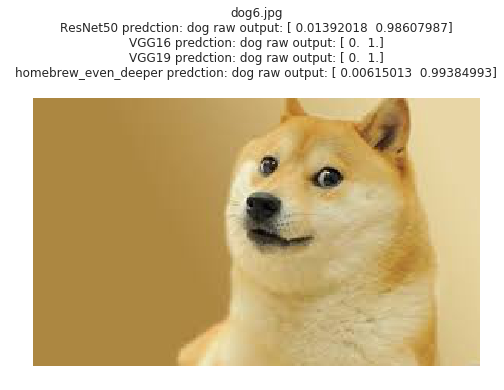

In [6]:
test_image_path = sorted(glob.glob(os.path.join("./test_image" + '/*.jpg')))
predict_and_plot(test_image_path, model_dict, inverse_one_hot_encoding_dict)

## Kaggle Test Data Prediction

In [24]:
def kaggle_test(model_dict = {}, out_file_dir = None, one_hot_encoding_dict = None, test_dir = KAGGLE_TEST_PATH):
    dog_index = 0 if int(one_hot_encoding_dict["dog"][0]) == 1 else 1
    print("dog predciton index:", dog_index)
    
    image_path_list = glob.glob(test_dir + "/*.jpg")
    image_path_list.sort(key = lambda x: int(x.split("/")[-1].split(".")[0]))
    #print(image_path_list)
    
    
    for model_name in model_dict.keys():
        print("predict Kaggle test data with model: " + model_name)
        model = load_model(model_dict[model_name])
        predictions = [] 
        for image_path in image_path_list:
            image = cv2.imread(image_path)
            image = resize_image(image, output_shape = (224, 224, 3))
        
            image_id = int(image_path.split("/")[-1].split(".")[0])
            image = np.expand_dims(image, axis=0)
            prdiction = model.predict(image)

            prediction_string = str(image_id) + "," + str(prdiction[0][dog_index]) + "\n"
            #print(prediction_string)
            predictions.append(prediction_string)
        
        with open(KAGGLE_TEST_OUTPUT_DIR + "/" + model_name + "_prediction.csv", "w") as f:
            f.write("id,label\n")
            f.writelines(predictions)
        f.close()



kaggle_test(model_dict = model_dict, 
            one_hot_encoding_dict = one_hot_encoding_dict,
            out_file_dir = KAGGLE_TEST_OUTPUT_DIR, 
            test_dir = KAGGLE_TEST_PATH)    

    
    
    

dog predciton index: 1
predict Kaggle test data with model: VGG16
predict Kaggle test data with model: VGG19
predict Kaggle test data with model: homebrew_even_deeper
predict Kaggle test data with model: ResNet50
